In [13]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [14]:
df = pd.read_csv('USA_Housing.csv')

In [15]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [16]:
df.corr

<bound method DataFrame.corr of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

In [21]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']] ##Características
y = df['Price']  ##Alvo

In [23]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [25]:
x_treino

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
2080,85852.149181,5.625055,7.343476,33200.337842
4083,54453.081618,5.635768,7.152987,40552.086904
3128,45318.674181,5.709233,6.925561,47223.164270
1400,89338.453374,3.983346,6.611314,41264.906715
159,75954.818253,4.289916,7.418751,34467.758698
...,...,...,...,...
552,55378.104352,7.044520,6.565375,41416.979149
2712,82989.956303,6.331567,7.774634,19372.747680
463,76840.458011,5.533214,7.447127,29860.078313
699,80732.171302,8.151366,7.106489,28954.697730


In [27]:
y_treino

2080    1.668448e+06
4083    9.999707e+05
3128    8.020484e+05
1400    1.222021e+06
159     1.057253e+06
            ...     
552     9.779809e+05
2712    1.458423e+06
463     1.417276e+06
699     1.625703e+06
3265    1.277381e+06
Name: Price, Length: 3750, dtype: float64

In [29]:
modelo = LinearRegression()

In [31]:
modelo.fit(x_treino, y_treino)

LinearRegression()

In [33]:
y_previsto = modelo.predict(x_teste)

In [35]:
y_previsto

array([2015057.72111627,  936796.77624963, 1333381.36114784, ...,
       1595894.69646179, 1200495.30755038,  625276.90372877])

In [37]:
df['Price'].mean()

1232072.654142357

In [39]:
mean_absolute_error(y_previsto, y_teste)

80634.55483070659

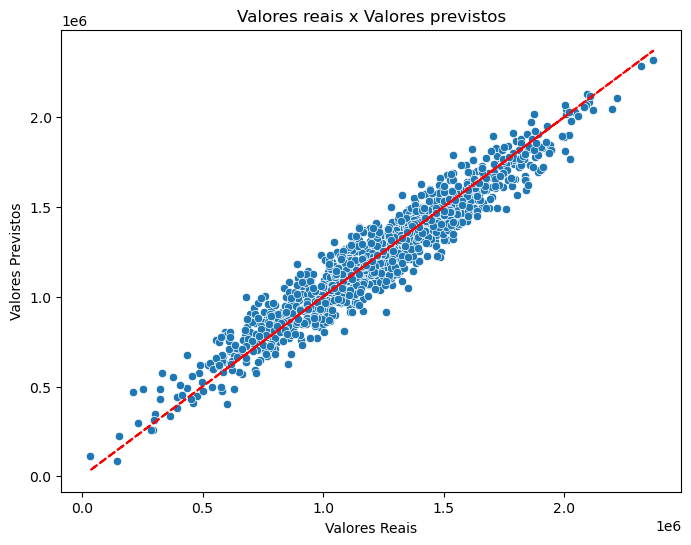

In [43]:
# Criação do gráfico de dispersão
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_teste, y=y_previsto)

# Adicionar linha de referência (ideal seria y_previsto = y_teste)
plt.plot(y_teste, y_teste, color='red', linestyle='--')

# Adicionar títulos e rótulos
plt.title("Valores reais x Valores previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")

# Exibir gráfico
plt.show()

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


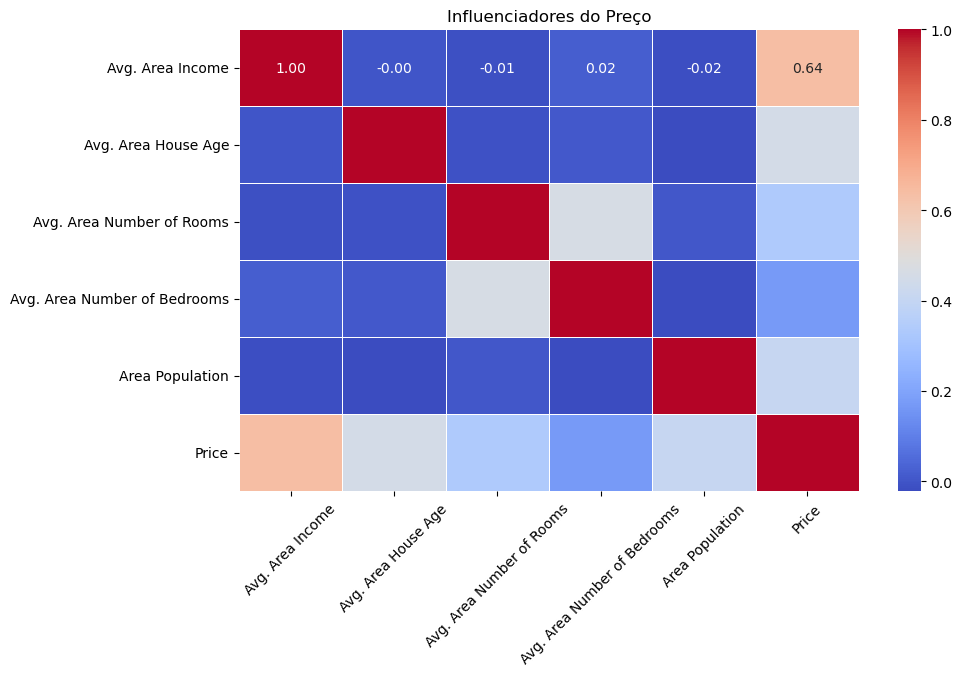

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlacao = df.corr(numeric_only=True)  # Garante que apenas colunas numéricas sejam usadas

# Exibir a correlação específica entre "Price" e outras variáveis
print(correlacao["Price"].sort_values(ascending=False))  # Ordena para facilitar a análise

# Criar um heatmap para visualizar todas as correlações
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45)

# Adicionar título ao gráfico
plt.title("Influenciadores do Preço")

# Exibir o gráfico
plt.show()
